In [1]:
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV


In [53]:
with open('SavedBases/allDummy.pkl','rb') as f:
    colunas, x_treino, x_teste, y_treino, y_teste = pickle.load(f)

In [104]:
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 4, 6, 8, 10],
    'max_features':[None,'sqrt','log2', 0.2, 0.4, 0.6, 0.8, 1],
    'splitter': ['best', 'random'],
    'random_state': [0,42],
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_weight_fraction_leaf': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
    }

arvore = GridSearchCV(
    estimator=DecisionTreeClassifier(),
    param_grid=params,
    cv=3,
    n_jobs=5,
    verbose=1,
)

In [105]:
arvore.fit(x_treino, y_treino)

Fitting 3 folds for each of 11520 candidates, totalling 34560 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=5,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 4, 6, 8, 10],
                         'max_features': [None, 'sqrt', 'log2', 0.2, 0.4, 0.6,
                                          0.8, 1],
                         'min_samples_split': [2, 4, 6, 8, 10],
                         'min_weight_fraction_leaf': [0.0, 0.1, 0.2, 0.3, 0.4,
                                                      0.5],
                         'random_state': [0, 42],
                         'splitter': ['best', 'random']},
             verbose=1)

In [106]:
print(arvore.best_params_)
print(arvore.best_score_)

{'criterion': 'gini', 'max_depth': None, 'max_features': None, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.2, 'random_state': 0, 'splitter': 'best'}
0.8888888888888888


**Usando o modelo com os Hiperparâmetros descobertos**

In [107]:
modelo = DecisionTreeClassifier(criterion='gini', max_depth=None, max_features=None, min_samples_split= 2, min_weight_fraction_leaf= 0.2,random_state=0, splitter='best')
modelo.fit(x_treino, y_treino)

DecisionTreeClassifier(min_weight_fraction_leaf=0.2, random_state=0)

In [108]:
previsoes = modelo.predict(x_teste)
previsoes

array(['Não', 'Não', 'Não'], dtype=object)

In [109]:
y_teste

6     Não
11    Sim
4     Não
Name: Conclusao, dtype: object

In [101]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from yellowbrick.classifier import ConfusionMatrix

c:\Users\pedro\AppData\Local\Programs\Python\Python311\Lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


0.6666666666666666

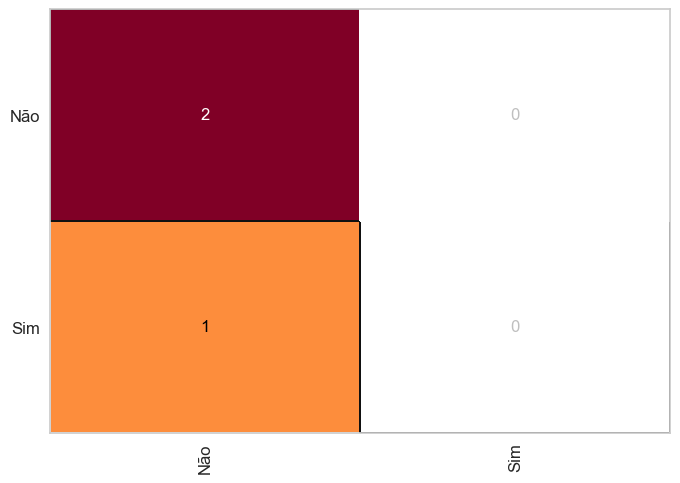

In [102]:
cm = ConfusionMatrix(modelo)
cm.score(x_teste, y_teste)

In [103]:
print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

         Não       0.67      1.00      0.80         2
         Sim       0.00      0.00      0.00         1

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3



c:\Users\pedro\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\pedro\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\pedro\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,